*Creado por:*

*Isabel Maniega*

# Pandas

1. [Vista de los datos(4.1.1)](#Vista-de-los-datos)
2. [Selección(4.1.2)](#Seleccion)
3. [Setting(4.1.1)](#Setting-(Modificacion-del-dataframe))
4. [Missing values(4.1.1)](#Missing-values)
5. [Operaciones (4.2.1)](#Operaciones)
6. [Unión de dataframe (4.1.1)](#Union-de-dataframe)
7. [Grouping (4.1.1 / 4.1.4)](#Grouping)
8. [Reshaping (4.1.1)](#Reshaping)
9. [Time Series](#Time-Series)
10. [Categoricals](#Categoricals)
11. [Plotting](#Plotting)

Contiene dos tipos de estructuras:

- **Series**: una matriz etiquetada unidimensional que contiene datos de cualquier tipo como números enteros, cadenas, objetos Python, etc.
- **Dataframe**: una estructura de datos bidimensional que contiene datos como una matriz bidimensional o una tabla con filas y columnas.

In [1]:
# pip install pandas

In [2]:
from IPython import display

In [3]:
import pandas as pd
import numpy as np

In [4]:
# Series:

s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
# date_range(genera un rango de fecha apartir de un valor, marcando el número de datos a generar (periods)
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,0.075885,0.087171,-1.052327,0.486892
2013-01-02,-1.448586,2.259786,0.196260,0.316254
2013-01-03,0.504366,0.707133,0.448309,-0.236701
2013-01-04,-0.124317,0.433375,1.877873,0.831223
2013-01-05,0.416557,0.963584,-0.521495,0.185275
2013-01-06,1.529925,0.558885,-0.656402,-1.990913


In [7]:
# dtypes nos muestra de que tipo son los datos:

df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

## Vista de los datos

In [8]:
# Muestra las primeras filas del dataframe, por defecto las 5 primeras
df.head()

,A,B,C,D
2013-01-01,0.075885,0.087171,-1.052327,0.486892
2013-01-02,-1.448586,2.259786,0.196260,0.316254
2013-01-03,0.504366,0.707133,0.448309,-0.236701
2013-01-04,-0.124317,0.433375,1.877873,0.831223
2013-01-05,0.416557,0.963584,-0.521495,0.185275


In [9]:
df.head(2)

,A,B,C,D
2013-01-01,0.075885,0.087171,-1.052327,0.486892
2013-01-02,-1.448586,2.259786,0.196260,0.316254


In [10]:
# Muestra las últimas filas de un dataframe, por defecto las 5 últimas:

df.tail()

,A,B,C,D
2013-01-02,-1.448586,2.259786,0.196260,0.316254
2013-01-03,0.504366,0.707133,0.448309,-0.236701
2013-01-04,-0.124317,0.433375,1.877873,0.831223
2013-01-05,0.416557,0.963584,-0.521495,0.185275
2013-01-06,1.529925,0.558885,-0.656402,-1.990913


In [11]:
df.tail(2)

,A,B,C,D
2013-01-05,0.416557,0.963584,-0.521495,0.185275
2013-01-06,1.529925,0.558885,-0.656402,-1.990913


In [12]:
# Muestra el valor de la primera columna que suele ser un valor único (id), en este ejemplo una fecha:

df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
# Muestra el nombre de las columnas:

df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [14]:
# Podemos convertir un dataframe en una matriz de numpy con:

df.to_numpy()

array([[ 0.07588548,  0.08717139, -1.05232714,  0.48689178],
       [-1.44858568,  2.25978565,  0.19625958,  0.31625366],
       [ 0.50436568,  0.70713306,  0.44830878, -0.236701  ],
       [-0.12431724,  0.43337491,  1.87787252,  0.83122266],
       [ 0.41655679,  0.9635842 , -0.52149491,  0.18527542],
       [ 1.52992461,  0.55888535, -0.65640186, -1.9909128 ]])

In [15]:
# Para obtener los estadísticos más representativos usamos:

df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.158972,0.834989,0.048703,-0.067995
std,0.973299,0.756266,1.054693,1.005421
min,-1.448586,0.087171,-1.052327,-1.990913
25%,-0.074267,0.464753,-0.622675,-0.131207
50%,0.246221,0.633009,-0.162618,0.250765
75%,0.482413,0.899471,0.385296,0.444232
max,1.529925,2.259786,1.877873,0.831223


In [16]:
# Podemos dar la vuelta a la tabla y poner lo que esta en filas en columnas y viceversa:

df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.075885,-1.448586,0.504366,-0.124317,0.416557,1.529925
B,0.087171,2.259786,0.707133,0.433375,0.963584,0.558885
C,-1.052327,0.196260,0.448309,1.877873,-0.521495,-0.656402
D,0.486892,0.316254,-0.236701,0.831223,0.185275,-1.990913


In [17]:
# Colocar los valores según el indice:

df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.486892,-1.052327,0.087171,0.075885
2013-01-02,0.316254,0.196260,2.259786,-1.448586
2013-01-03,-0.236701,0.448309,0.707133,0.504366
2013-01-04,0.831223,1.877873,0.433375,-0.124317
2013-01-05,0.185275,-0.521495,0.963584,0.416557
2013-01-06,-1.990913,-0.656402,0.558885,1.529925


In [18]:
# Ordenar los datos según una columna:

df.sort_values(by="B")

,A,B,C,D
2013-01-01,0.075885,0.087171,-1.052327,0.486892
2013-01-04,-0.124317,0.433375,1.877873,0.831223
2013-01-06,1.529925,0.558885,-0.656402,-1.990913
2013-01-03,0.504366,0.707133,0.448309,-0.236701
2013-01-05,0.416557,0.963584,-0.521495,0.185275
2013-01-02,-1.448586,2.259786,0.196260,0.316254


## Seleccion

## ```GetItem()```

**Selección de columna**. Existen 3 formas de seleccionar una columna:

In [19]:
df['A']

2013-01-01    0.075885
2013-01-02   -1.448586
2013-01-03    0.504366
2013-01-04   -0.124317
2013-01-05    0.416557
2013-01-06    1.529925
Freq: D, Name: A, dtype: float64

In [20]:
df.A

2013-01-01    0.075885
2013-01-02   -1.448586
2013-01-03    0.504366
2013-01-04   -0.124317
2013-01-05    0.416557
2013-01-06    1.529925
Freq: D, Name: A, dtype: float64

In [21]:
df[['A']]

,A
2013-01-01,0.075885
2013-01-02,-1.448586
2013-01-03,0.504366
2013-01-04,-0.124317
2013-01-05,0.416557
2013-01-06,1.529925


**Selección de filas mediante slicing(:)**

In [22]:
df[0:2]

,A,B,C,D
2013-01-01,0.075885,0.087171,-1.052327,0.486892
2013-01-02,-1.448586,2.259786,0.196260,0.316254


In [23]:
df["20130103":"20130105"]

,A,B,C,D
2013-01-03,0.504366,0.707133,0.448309,-0.236701
2013-01-04,-0.124317,0.433375,1.877873,0.831223
2013-01-05,0.416557,0.963584,-0.521495,0.185275


**Selección con la función ```loc[]``` y ```at[]```**

In [24]:
# Filas que coinciden con una etiqueta, selección de la primera fila:

df.loc[dates[0]]

A    0.075885
B    0.087171
C   -1.052327
D    0.486892
Name: 2013-01-01 00:00:00, dtype: float64

In [25]:
# Seleccionar todas las filas de una determinada columna:

df.loc[:, ['B', 'C']]

,B,C
2013-01-01,0.087171,-1.052327
2013-01-02,2.259786,0.196260
2013-01-03,0.707133,0.448309
2013-01-04,0.433375,1.877873
2013-01-05,0.963584,-0.521495
2013-01-06,0.558885,-0.656402


In [26]:
# Seleccionar por filas y columnas:

df.loc["20130103":"20130105", ['B', 'C']]

,B,C
2013-01-03,0.707133,0.448309
2013-01-04,0.433375,1.877873
2013-01-05,0.963584,-0.521495


In [27]:
# Seleccionar para un valor determinado -0.891699 (20130103, B):

df.loc[dates[2], 'B']

np.float64(0.7071330618807924)

In [28]:
df.at[dates[2], 'B']

np.float64(0.7071330618807924)

**Selección por posicion: método ```iloc[]``` y ```iat[]```**

In [29]:
# Selección de una fila en posición 3:

df.iloc[3]

A   -0.124317
B    0.433375
C    1.877873
D    0.831223
Name: 2013-01-04 00:00:00, dtype: float64

In [30]:
# Selección de una fila y columna por slicing:

df.iloc[3:5, 1:3]

,B,C
2013-01-04,0.433375,1.877873
2013-01-05,0.963584,-0.521495


In [31]:
# Selección por lista de posiciones:
# Filas: 1, 2, 4
# Columnas: 0(A), 2(C)

df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.448586,0.196260
2013-01-03,0.504366,0.448309
2013-01-05,0.416557,-0.521495


In [32]:
# Selección por filas o columnas:

df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-1.448586,2.259786,0.196260,0.316254
2013-01-03,0.504366,0.707133,0.448309,-0.236701


In [33]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.087171,-1.052327
2013-01-02,2.259786,0.196260
2013-01-03,0.707133,0.448309
2013-01-04,0.433375,1.877873
2013-01-05,0.963584,-0.521495
2013-01-06,0.558885,-0.656402


In [34]:
# Seleccionar un valor concreto por posición (2013-01-03, 'B'):

df.iloc[2, 1]

np.float64(0.7071330618807924)

In [35]:
df.iat[2, 1]

np.float64(0.7071330618807924)

## Boolean indexing

In [36]:
# Selección por comparativa:

df[df['A'] >= 0.2]

,A,B,C,D
2013-01-03,0.504366,0.707133,0.448309,-0.236701
2013-01-05,0.416557,0.963584,-0.521495,0.185275
2013-01-06,1.529925,0.558885,-0.656402,-1.990913


In [37]:
df[df > 0]

,A,B,C,D
2013-01-01,0.075885,0.087171,NaN,0.486892
2013-01-02,NaN,2.259786,0.196260,0.316254
2013-01-03,0.504366,0.707133,0.448309,NaN
2013-01-04,NaN,0.433375,1.877873,0.831223
2013-01-05,0.416557,0.963584,NaN,0.185275
2013-01-06,1.529925,0.558885,NaN,NaN


**Método ```isin()```**

In [38]:
# Selección según una coincidencia (filtrado):

df2 = pd.DataFrame(["one", "one", "two", "three", "four", "three"], columns=['E'])

df2[df2["E"].isin(["one", "four"])]

,E
0,one
1,one
4,four


## Setting (Modificacion del dataframe)

In [39]:
# Añadir Valores nuevo 

serie = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130101", periods=6))
serie

2013-01-01    1
2013-01-02    2
2013-01-03    3
2013-01-04    4
2013-01-05    5
2013-01-06    6
Freq: D, dtype: int64

In [40]:
df['E'] = serie
df

,A,B,C,D,E
2013-01-01,0.075885,0.087171,-1.052327,0.486892,1
2013-01-02,-1.448586,2.259786,0.196260,0.316254,2
2013-01-03,0.504366,0.707133,0.448309,-0.236701,3
2013-01-04,-0.124317,0.433375,1.877873,0.831223,4
2013-01-05,0.416557,0.963584,-0.521495,0.185275,5
2013-01-06,1.529925,0.558885,-0.656402,-1.990913,6


In [41]:
# Modificar valor por etiqueta
# Se modifica el primer valor de df por 0 en la columna A:

df.at[dates[0], "A"] = 0
df

,A,B,C,D,E
2013-01-01,0.000000,0.087171,-1.052327,0.486892,1
2013-01-02,-1.448586,2.259786,0.196260,0.316254,2
2013-01-03,0.504366,0.707133,0.448309,-0.236701,3
2013-01-04,-0.124317,0.433375,1.877873,0.831223,4
2013-01-05,0.416557,0.963584,-0.521495,0.185275,5
2013-01-06,1.529925,0.558885,-0.656402,-1.990913,6


In [42]:
# Modificación de valor por posición
# Se modifica el primer valor de la columna B:

df.iat[0, 1] = 0
df

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-1.052327,0.486892,1
2013-01-02,-1.448586,2.259786,0.196260,0.316254,2
2013-01-03,0.504366,0.707133,0.448309,-0.236701,3
2013-01-04,-0.124317,0.433375,1.877873,0.831223,4
2013-01-05,0.416557,0.963584,-0.521495,0.185275,5
2013-01-06,1.529925,0.558885,-0.656402,-1.990913,6


In [43]:
# Modificación asignada por Numpy usando array:

df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-1.052327,5.0,1
2013-01-02,-1.448586,2.259786,0.196260,5.0,2
2013-01-03,0.504366,0.707133,0.448309,5.0,3
2013-01-04,-0.124317,0.433375,1.877873,5.0,4
2013-01-05,0.416557,0.963584,-0.521495,5.0,5
2013-01-06,1.529925,0.558885,-0.656402,5.0,6


In [44]:
# Modificar según una condición (where):

df2 = df.copy()  # Realización de una copia del df

df2[df2 > 0.1] = -df2
df2

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-1.052327,-5.0,-1
2013-01-02,-1.448586,-2.259786,-0.196260,-5.0,-2
2013-01-03,-0.504366,-0.707133,-0.448309,-5.0,-3
2013-01-04,-0.124317,-0.433375,-1.877873,-5.0,-4
2013-01-05,-0.416557,-0.963584,-0.521495,-5.0,-5
2013-01-06,-1.529925,-0.558885,-0.656402,-5.0,-6


## Missing values

In [45]:
# Creamos una columna nueva con valores nulos: 

df1 = df.reindex(index=dates[0:4], columns=list(df.columns))

df1.loc[dates[2]:dates[3], "E"] = np.nan
df1.at[dates[0], "D"] = np.nan

print(df1)

                   A         B         C    D    E
2013-01-01  0.000000  0.000000 -1.052327  NaN  1.0
2013-01-02 -1.448586  2.259786  0.196260  5.0  2.0
2013-01-03  0.504366  0.707133  0.448309  5.0  NaN
2013-01-04 -0.124317  0.433375  1.877873  5.0  NaN


In [46]:
# Eliminamos los valores nulos con la función dropna(): eliminando cualquier fila que contenga valores nulos

df_1 = df1.dropna(how="any")
df_1

,A,B,C,D,E
2013-01-02,-1.448586,2.259786,0.19626,5.0,2.0


In [47]:
# Rellenar valores nulos:

df_1 = df1.fillna(value=5)
df_1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-1.052327,5.0,1.0
2013-01-02,-1.448586,2.259786,0.196260,5.0,2.0
2013-01-03,0.504366,0.707133,0.448309,5.0,5.0
2013-01-04,-0.124317,0.433375,1.877873,5.0,5.0


In [48]:
# isna() nos muestra si en el df hay valores nulo o no, sustituyendo por un booleano (True / False)

pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,True,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## Operaciones

En estos casos no tiene en cuenta los valores nulos.

In [4]:
df = pd.DataFrame({"notas_1": [15, 16, 15, 17, 14, 14, 14, 10, 15, 25],
                   "notas_2": [16, 21, 16, 16, 13, 15, 15, 19, 22, 15],
                   "notas_3": [17, 22, 15, 22, 14, 15, 16, 15, 24, 16]})
df.head()

,notas_1,notas_2,notas_3
0,15,16,17
1,16,21,22
2,15,16,15
3,17,16,22
4,14,13,14


### Tendencia Central

**Media**

Como calcular la media de las distintas notas:

In [5]:
media_1 = df["notas_1"].mean()
media_1

np.float64(15.5)

In [6]:
media_2 = df["notas_2"].mean()
media_2

np.float64(16.8)

In [7]:
media_3 = df["notas_3"].mean()
media_3

np.float64(17.6)

**Mediana**

Como calcular la mediana de las distintas notas:

In [8]:
mediana_1 = df["notas_1"].median()
mediana_1

np.float64(15.0)

In [9]:
mediana_2 = df["notas_2"].median()
mediana_2

np.float64(16.0)

In [10]:
mediana_3 = df["notas_3"].median()
mediana_3

np.float64(16.0)

**Moda**

Como calcular la moda de las distintas notas:

In [11]:
moda_1 = df["notas_1"].mode()
moda_1

0    14
1    15
Name: notas_1, dtype: int64

In [12]:
moda_2 = df["notas_2"].mode()
moda_2

0    15
1    16
Name: notas_2, dtype: int64

In [13]:
moda_3 = df["notas_3"].mode()
moda_3

0    15
Name: notas_3, dtype: int64

In [14]:
df.notas_3.value_counts()

notas_3
15    3
22    2
16    2
17    1
14    1
24    1
Name: count, dtype: int64

**Resultados Nota_1:**

In [15]:
print(f"Media: {media_1}, Mediana: {mediana_1}, Moda: \n{moda_1}")

Media: 15.5, Mediana: 15.0, Moda: 
0    14
1    15
Name: notas_1, dtype: int64


**Resultados Nota_2:**

In [16]:
print(f"Media: {media_2}, Mediana: {mediana_2}, Moda: \n{moda_2}")

Media: 16.8, Mediana: 16.0, Moda: 
0    15
1    16
Name: notas_2, dtype: int64


**Resultados Nota_2:**

In [17]:
print(f"Media: {media_3}, Mediana: {mediana_3}, Moda: \n{moda_3}")

Media: 17.6, Mediana: 16.0, Moda: 
0    15
Name: notas_3, dtype: int64


**Varianza**

Se calcula la cuasi-varianza:

$$
S^2= \frac{∑^n_{i=1}(x_i−X)^2}{n−1}
$$

In [18]:
var_1 = df["notas_1"].var()
var_1

np.float64(14.5)

In [21]:
var_2 = df["notas_2"].var()
var_2

np.float64(8.399999999999999)

In [20]:
var_3 = df["notas_3"].var()
var_3

np.float64(13.155555555555557)

Si queremos calcular la varianza, utilizamos el argumento ddof=0. El denominador en la fórmula será entonces n−ddof=0:

In [24]:
var_1 = df["notas_1"].var(ddof=0)
var_1

np.float64(13.05)

**Desviación típica**

En python, utilizamos el método .std() para calcular la cuasi-desviación típica. Para calcular la desviación típica, nuevamente utilizamos ddof=0.
$$
S^=\sqrt{S^2}
$$

In [25]:
std_1 = df["notas_1"].std()
std_1

np.float64(3.8078865529319543)

In [26]:
std_2 = df["notas_2"].std()
std_2

np.float64(2.8982753492378874)

In [27]:
std_3 = df["notas_3"].std()
std_3

np.float64(3.6270588023294517)

Si queremos calcular la varianza, utilizamos el argumento ddof=0. El denominador en la fórmula será entonces n−ddof=0:

In [28]:
std_1 = df["notas_1"].std(ddof=0)
std_1

np.float64(3.6124783736376886)

# RESUMEN

In [30]:
df.describe()

,notas_1,notas_2,notas_3
count,10.000000,10.000000,10.000000
mean,15.500000,16.800000,17.600000
std,3.807887,2.898275,3.627059
min,10.000000,13.000000,14.000000
25%,14.000000,15.000000,15.000000
50%,15.000000,16.000000,16.000000
75%,15.750000,18.250000,20.750000
max,25.000000,22.000000,24.000000


## Union de dataframe

In [49]:
iris = pd.read_csv('Iris.csv')
iris = iris.drop(['Id'], axis=1)
iris_setosa = iris[0:50]
iris_setosa

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [50]:
iris_virginica = iris[100:]
iris_virginica

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica


In [51]:
iris_versicolor = pd.read_json('iris_versicolor.json')
iris_versicolor

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,7.0,3.2,4.7,1.4,Iris-versicolor
1,6.4,3.2,4.5,1.5,Iris-versicolor
2,6.9,3.1,4.9,1.5,Iris-versicolor
3,5.5,2.3,4.0,1.3,Iris-versicolor
4,6.5,2.8,4.6,1.5,Iris-versicolor
5,5.7,2.8,4.5,1.3,Iris-versicolor
6,6.3,3.3,4.7,1.6,Iris-versicolor
7,4.9,2.4,3.3,1.0,Iris-versicolor
8,6.6,2.9,4.6,1.3,Iris-versicolor
9,5.2,2.7,3.9,1.4,Iris-versicolor


## ```concat()```

In [52]:
# Unión de varios dataframe por nombre de columna, los apendiza al final:

dfs = [iris_setosa, iris_virginica, iris_versicolor]
iris_concat = pd.concat(dfs)
iris_concat

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
45,5.7,3.0,4.2,1.2,Iris-versicolor
46,5.7,2.9,4.2,1.3,Iris-versicolor
47,6.2,2.9,4.3,1.3,Iris-versicolor
48,5.1,2.5,3.0,1.1,Iris-versicolor


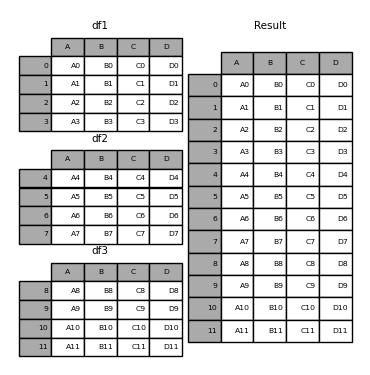

In [53]:
display.Image('merging_concat_basic.png')

In [54]:
iris = pd.read_csv('Iris.csv')
iris_medidas = iris.iloc[:, 0:4]
iris_medidas

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [55]:
iris_especies = iris[['Species']]
iris_especies

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [56]:
# Apendizar una columna nueva usando concat:
# axis=1 elegimos el eje 
# join='inner' elegimos el tipo de unión:

new_setosa = pd.concat([iris_medidas, iris_especies], axis=1, join='inner')
new_setosa

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,1,5.1,3.5,1.4,Iris-setosa
1,2,4.9,3.0,1.4,Iris-setosa
2,3,4.7,3.2,1.3,Iris-setosa
3,4,4.6,3.1,1.5,Iris-setosa
4,5,5.0,3.6,1.4,Iris-setosa
...,...,...,...,...,...
145,146,6.7,3.0,5.2,Iris-virginica
146,147,6.3,2.5,5.0,Iris-virginica
147,148,6.5,3.0,5.2,Iris-virginica
148,149,6.2,3.4,5.4,Iris-virginica


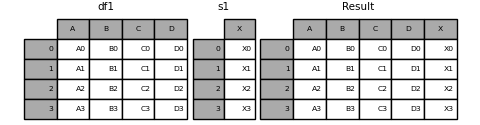

In [57]:
display.Image('merging_concat_mixed.png')

## ```merge()```

**many-to-many:**  El método merge une dos dataframe por el Id de cada una de las filas

In [58]:
new_species = iris.loc[:, ['Id', 'Species']]
new_species

,Id,Species
0,1,Iris-setosa
1,2,Iris-setosa
2,3,Iris-setosa
3,4,Iris-setosa
4,5,Iris-setosa
...,...,...
145,146,Iris-virginica
146,147,Iris-virginica
147,148,Iris-virginica
148,149,Iris-virginica


In [59]:
new_setosa = pd.merge(iris_medidas, new_species, on='Id')
new_setosa

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,1,5.1,3.5,1.4,Iris-setosa
1,2,4.9,3.0,1.4,Iris-setosa
2,3,4.7,3.2,1.3,Iris-setosa
3,4,4.6,3.1,1.5,Iris-setosa
4,5,5.0,3.6,1.4,Iris-setosa
...,...,...,...,...,...
145,146,6.7,3.0,5.2,Iris-virginica
146,147,6.3,2.5,5.0,Iris-virginica
147,148,6.5,3.0,5.2,Iris-virginica
148,149,6.2,3.4,5.4,Iris-virginica


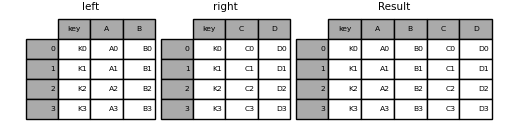

In [60]:
display.Image('merging_merge_on_key.png')

Se puede añadir un parámetro que se llama ```how```, donde se especifica el tipo de unión de los dataframes, para ello, nos basamos en la siguiente tabla para relacionarlos con los comandos SQL:

| Merge method |  SQL Join Name  |                  Description                       | 
|--------------|-----------------|----------------------------------------------------|
|     left     | LEFT OUTER JOIN | Use keys from left frame only                      | 
|    right     | RIGHT OUTER JOIN| Use keys from right frame only                     |
|    outer     | FULL OUTER JOIN | Use union of keys from both frames                 |
|    inner     |   INNER JOIN    | Use intersection of keys from both frames          | 
|    cross     |   CROSS JOIN    | Create the cartesian product of rows of both frames|

In [61]:
new_setosa = pd.merge(iris_medidas, new_species, how='left', on='Id')
new_setosa

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,1,5.1,3.5,1.4,Iris-setosa
1,2,4.9,3.0,1.4,Iris-setosa
2,3,4.7,3.2,1.3,Iris-setosa
3,4,4.6,3.1,1.5,Iris-setosa
4,5,5.0,3.6,1.4,Iris-setosa
...,...,...,...,...,...
145,146,6.7,3.0,5.2,Iris-virginica
146,147,6.3,2.5,5.0,Iris-virginica
147,148,6.5,3.0,5.2,Iris-virginica
148,149,6.2,3.4,5.4,Iris-virginica


In [62]:
new_setosa = pd.merge(iris_medidas, new_species, how='right', on='Id')
new_setosa

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,1,5.1,3.5,1.4,Iris-setosa
1,2,4.9,3.0,1.4,Iris-setosa
2,3,4.7,3.2,1.3,Iris-setosa
3,4,4.6,3.1,1.5,Iris-setosa
4,5,5.0,3.6,1.4,Iris-setosa
...,...,...,...,...,...
145,146,6.7,3.0,5.2,Iris-virginica
146,147,6.3,2.5,5.0,Iris-virginica
147,148,6.5,3.0,5.2,Iris-virginica
148,149,6.2,3.4,5.4,Iris-virginica


In [63]:
new_setosa = pd.merge(iris_medidas, new_species, how='inner', on='Id')
new_setosa

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,1,5.1,3.5,1.4,Iris-setosa
1,2,4.9,3.0,1.4,Iris-setosa
2,3,4.7,3.2,1.3,Iris-setosa
3,4,4.6,3.1,1.5,Iris-setosa
4,5,5.0,3.6,1.4,Iris-setosa
...,...,...,...,...,...
145,146,6.7,3.0,5.2,Iris-virginica
146,147,6.3,2.5,5.0,Iris-virginica
147,148,6.5,3.0,5.2,Iris-virginica
148,149,6.2,3.4,5.4,Iris-virginica


In [64]:
new_setosa = pd.merge(iris_medidas, new_species, how='outer', on='Id')
new_setosa

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,1,5.1,3.5,1.4,Iris-setosa
1,2,4.9,3.0,1.4,Iris-setosa
2,3,4.7,3.2,1.3,Iris-setosa
3,4,4.6,3.1,1.5,Iris-setosa
4,5,5.0,3.6,1.4,Iris-setosa
...,...,...,...,...,...
145,146,6.7,3.0,5.2,Iris-virginica
146,147,6.3,2.5,5.0,Iris-virginica
147,148,6.5,3.0,5.2,Iris-virginica
148,149,6.2,3.4,5.4,Iris-virginica


In [65]:
# 

new_setosa = pd.merge(iris_medidas, new_species, how='cross')
new_setosa

,Id_x,SepalLengthCm,SepalWidthCm,PetalLengthCm,Id_y,Species
0,1,5.1,3.5,1.4,1,Iris-setosa
1,1,5.1,3.5,1.4,2,Iris-setosa
2,1,5.1,3.5,1.4,3,Iris-setosa
3,1,5.1,3.5,1.4,4,Iris-setosa
4,1,5.1,3.5,1.4,5,Iris-setosa
...,...,...,...,...,...,...
22495,150,5.9,3.0,5.1,146,Iris-virginica
22496,150,5.9,3.0,5.1,147,Iris-virginica
22497,150,5.9,3.0,5.1,148,Iris-virginica
22498,150,5.9,3.0,5.1,149,Iris-virginica


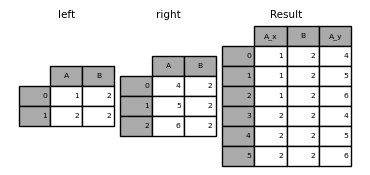

In [66]:
# Si no existe la clave la duplica en el caso how=cross:

display.Image('merging_merge_on_key_dup.png')

## ```join()```

In [67]:
iris_medidas

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [68]:
iris_especies

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [69]:
iris_2 = iris_medidas.join(iris_especies)
iris_2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,1,5.1,3.5,1.4,Iris-setosa
1,2,4.9,3.0,1.4,Iris-setosa
2,3,4.7,3.2,1.3,Iris-setosa
3,4,4.6,3.1,1.5,Iris-setosa
4,5,5.0,3.6,1.4,Iris-setosa
...,...,...,...,...,...
145,146,6.7,3.0,5.2,Iris-virginica
146,147,6.3,2.5,5.0,Iris-virginica
147,148,6.5,3.0,5.2,Iris-virginica
148,149,6.2,3.4,5.4,Iris-virginica


También se le puede añadir los parámetros de how y on, igual que se hace con el método ```merge()```

## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria

- **Applying** a function to each group independently

- **Combining** the results into a data structure

In [70]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [71]:
iris_sepal = iris.groupby('Species')[["SepalLengthCm", "SepalWidthCm"]].mean()
iris_sepal

,SepalLengthCm,SepalWidthCm
Species,,
Iris-setosa,5.006,3.418
Iris-versicolor,5.936,2.770
Iris-virginica,6.588,2.974


In [72]:
iris_petal = iris.groupby('Species')[["PetalLengthCm", "PetalWidthCm"]].mean()
iris_petal

,PetalLengthCm,PetalWidthCm
Species,,
Iris-setosa,1.464,0.244
Iris-versicolor,4.260,1.326
Iris-virginica,5.552,2.026


## Reshaping

## ```stack()```

In [73]:
# Ponemos como columna de index la de especies, asi aplicaremos los datos segun de que
# especie sean:

reiris = iris.set_index('Species', append=True)
reiris

,,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
,Species,,,,,
0,Iris-setosa,1,5.1,3.5,1.4,0.2
1,Iris-setosa,2,4.9,3.0,1.4,0.2
2,Iris-setosa,3,4.7,3.2,1.3,0.2
3,Iris-setosa,4,4.6,3.1,1.5,0.2
4,Iris-setosa,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...
145,Iris-virginica,146,6.7,3.0,5.2,2.3
146,Iris-virginica,147,6.3,2.5,5.0,1.9
147,Iris-virginica,148,6.5,3.0,5.2,2.0


In [74]:
stack_iris = reiris.stack(future_stack=True)
stack_iris

     Species                      
0    Iris-setosa     Id                 1.0
                     SepalLengthCm      5.1
                     SepalWidthCm       3.5
                     PetalLengthCm      1.4
                     PetalWidthCm       0.2
                                      ...  
149  Iris-virginica  Id               150.0
                     SepalLengthCm      5.9
                     SepalWidthCm       3.0
                     PetalLengthCm      5.1
                     PetalWidthCm       1.8
Length: 750, dtype: float64

Nos muestra los datos apilados según la especie y las longitudes de los pétalos y sépalos.

Para desapilar usaremos el método ```unstack```.

In [75]:
unstack_iris = reiris.unstack()
unstack_iris

Id                                SepalLengthCm  \
Species Iris-setosa Iris-versicolor Iris-virginica   Iris-setosa   
0               1.0             NaN            NaN           5.1   
1               2.0             NaN            NaN           4.9   
2               3.0             NaN            NaN           4.7   
3               4.0             NaN            NaN           4.6   
4               5.0             NaN            NaN           5.0   
..              ...             ...            ...           ...   
145             NaN             NaN          146.0           NaN   
146             NaN             NaN          147.0           NaN   
147             NaN             NaN          148.0           NaN   
148             NaN             NaN          149.0           NaN   
149             NaN             NaN          150.0           NaN   

                                       SepalWidthCm                  \
Species Iris-versicolor Iris-virginica  Iris-setosa Iris-versicolor   
0                   NaN            NaN          3.5             NaN   
1                   NaN            NaN          3.0             NaN   
2                   NaN            NaN          3.2             NaN   
3                   NaN            NaN          3.1             NaN   
4                   NaN            NaN          3.6             NaN   
..                  ...            ...          ...             ...   
145                 NaN            6.7          NaN             NaN   
146                 NaN            6.3          NaN             NaN   
147                 NaN            6.5          NaN             NaN   
148                 NaN            6.2          NaN             NaN   
149                 NaN            5.9          NaN             NaN   

                       PetalLengthCm                                 \
Species Iris-virginica   Iris-setosa Iris-versicolor Iris-virginica   
0                  NaN           1.4             NaN            NaN   
1                  NaN           1.4             NaN            NaN   
2                  NaN           1.3             NaN            NaN   
3                  NaN           1.5             NaN            NaN   
4                  NaN           1.4             NaN            NaN   
..                 ...           ...             ...            ...   
145                3.0           NaN             NaN            5.2   
146                2.5           NaN             NaN            5.0   
147                3.0           NaN             NaN            5.2   
148                3.4           NaN             NaN            5.4   
149                3.0           NaN             NaN            5.1   

        PetalWidthCm                                 
Species  Iris-setosa Iris-versicolor Iris-virginica  
0                0.2             NaN            NaN  
1                0.2             NaN            NaN  
2                0.2             NaN            NaN  
3                0.2             NaN            NaN  
4                0.2             NaN            NaN  
..               ...             ...            ...  
145              NaN             NaN            2.3  
146              NaN             NaN            1.9  
147              NaN             NaN            2.0  
148              NaN             NaN            2.3  
149              NaN             NaN            1.8  

[150 rows x 15 columns]

## ```pivot_table()```

In [76]:
# Agrupación de datos de especie por media:
# Podemos añadir: df, values="D", index=["A", "B"], columns=["C"]

iris_pivot = pd.pivot_table(iris, index='Species')
iris_pivot

,Id,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm
Species,,,,,
Iris-setosa,25.5,1.464,0.244,5.006,3.418
Iris-versicolor,75.5,4.260,1.326,5.936,2.770
Iris-virginica,125.5,5.552,2.026,6.588,2.974


In [77]:
# Agrupación de datos de especie por media:

iris_pivot2 = pd.pivot_table(iris, index='Species', aggfunc="sum")
iris_pivot2

,Id,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm
Species,,,,,
Iris-setosa,1275,73.2,12.2,250.3,170.9
Iris-versicolor,3775,213.0,66.3,296.8,138.5
Iris-virginica,6275,277.6,101.3,329.4,148.7


In [78]:
# el parametro values nos ayuda a seleccionar las columnas concretas:


iris_pivot = pd.pivot_table(iris, values="PetalLengthCm", index='Species')
iris_pivot

,PetalLengthCm
Species,
Iris-setosa,1.464
Iris-versicolor,4.260
Iris-virginica,5.552


## Time Series

In [79]:
# Generamos una serie temporal primero generamos los valores de la fecha de la que quieres partir, creando 15 días consecutivos:
# Una vez creados ponemos valores aleatorios a esas fechas:

rng = pd.date_range("6/1/2024 00:00", periods=15, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2024-06-01   -0.044445
2024-06-02   -0.337104
2024-06-03    0.204216
2024-06-04   -0.837333
2024-06-05    1.101381
2024-06-06   -1.580353
2024-06-07    0.214274
2024-06-08   -1.797839
2024-06-09    0.592059
2024-06-10   -0.337609
2024-06-11   -0.245955
2024-06-12   -0.487665
2024-06-13    1.374180
2024-06-14   -1.236458
2024-06-15    0.438837
Freq: D, dtype: float64

## ```tz_localize()```

In [80]:
# añadimos la hora al dataframe creado:

ts_utc = ts.tz_localize("UTC")
ts_utc

2024-06-01 00:00:00+00:00   -0.044445
2024-06-02 00:00:00+00:00   -0.337104
2024-06-03 00:00:00+00:00    0.204216
2024-06-04 00:00:00+00:00   -0.837333
2024-06-05 00:00:00+00:00    1.101381
2024-06-06 00:00:00+00:00   -1.580353
2024-06-07 00:00:00+00:00    0.214274
2024-06-08 00:00:00+00:00   -1.797839
2024-06-09 00:00:00+00:00    0.592059
2024-06-10 00:00:00+00:00   -0.337609
2024-06-11 00:00:00+00:00   -0.245955
2024-06-12 00:00:00+00:00   -0.487665
2024-06-13 00:00:00+00:00    1.374180
2024-06-14 00:00:00+00:00   -1.236458
2024-06-15 00:00:00+00:00    0.438837
Freq: D, dtype: float64

## ```tz_convert()```

In [81]:
# Ponemos la franja horaria a la cual nos encontramos:

ts_utc.tz_convert("Europe/Madrid")

2024-06-01 02:00:00+02:00   -0.044445
2024-06-02 02:00:00+02:00   -0.337104
2024-06-03 02:00:00+02:00    0.204216
2024-06-04 02:00:00+02:00   -0.837333
2024-06-05 02:00:00+02:00    1.101381
2024-06-06 02:00:00+02:00   -1.580353
2024-06-07 02:00:00+02:00    0.214274
2024-06-08 02:00:00+02:00   -1.797839
2024-06-09 02:00:00+02:00    0.592059
2024-06-10 02:00:00+02:00   -0.337609
2024-06-11 02:00:00+02:00   -0.245955
2024-06-12 02:00:00+02:00   -0.487665
2024-06-13 02:00:00+02:00    1.374180
2024-06-14 02:00:00+02:00   -1.236458
2024-06-15 02:00:00+02:00    0.438837
Freq: D, dtype: float64

## ```offsets.BusinessDay()```

Escogemos de ese periodo de tiempo los que sean laborables, ayuda de offset.BusinnesDay():

In [82]:
rng

DatetimeIndex(['2024-06-01', '2024-06-02', '2024-06-03', '2024-06-04',
               '2024-06-05', '2024-06-06', '2024-06-07', '2024-06-08',
               '2024-06-09', '2024-06-10', '2024-06-11', '2024-06-12',
               '2024-06-13', '2024-06-14', '2024-06-15'],
              dtype='datetime64[ns]', freq='D')

In [83]:
# se añade 5 como número de días a representar:
rng = rng + pd.offsets.BusinessDay(5)

In [84]:
ts = pd.Series(np.random.randn(len(rng)), rng).tz_localize("UTC")
ts

2024-06-07 00:00:00+00:00    2.347094
2024-06-07 00:00:00+00:00    0.813553
2024-06-10 00:00:00+00:00    0.681212
2024-06-11 00:00:00+00:00    0.369417
2024-06-12 00:00:00+00:00    1.896774
2024-06-13 00:00:00+00:00   -0.443403
2024-06-14 00:00:00+00:00    1.156888
2024-06-14 00:00:00+00:00   -0.399655
2024-06-14 00:00:00+00:00    0.972273
2024-06-17 00:00:00+00:00   -0.544040
2024-06-18 00:00:00+00:00   -2.143368
2024-06-19 00:00:00+00:00    0.545616
2024-06-20 00:00:00+00:00    0.687933
2024-06-21 00:00:00+00:00    1.982088
2024-06-21 00:00:00+00:00   -0.013228
dtype: float64

In [85]:
ts.tz_convert("Europe/Madrid")

2024-06-07 02:00:00+02:00    2.347094
2024-06-07 02:00:00+02:00    0.813553
2024-06-10 02:00:00+02:00    0.681212
2024-06-11 02:00:00+02:00    0.369417
2024-06-12 02:00:00+02:00    1.896774
2024-06-13 02:00:00+02:00   -0.443403
2024-06-14 02:00:00+02:00    1.156888
2024-06-14 02:00:00+02:00   -0.399655
2024-06-14 02:00:00+02:00    0.972273
2024-06-17 02:00:00+02:00   -0.544040
2024-06-18 02:00:00+02:00   -2.143368
2024-06-19 02:00:00+02:00    0.545616
2024-06-20 02:00:00+02:00    0.687933
2024-06-21 02:00:00+02:00    1.982088
2024-06-21 02:00:00+02:00   -0.013228
dtype: float64

In [86]:
import matplotlib.pyplot as plt

<Axes: >

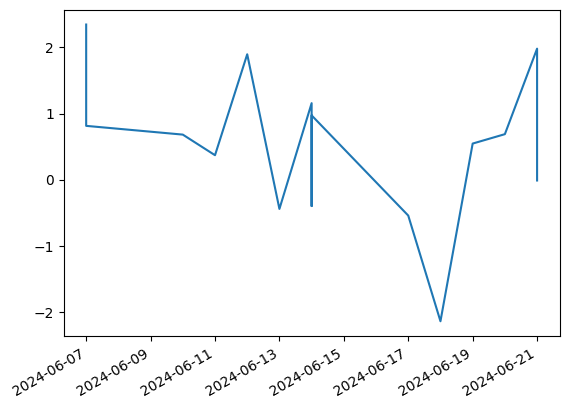

In [87]:
ts.plot()

## Categoricals

In [88]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [89]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [90]:
# Convertimos la columna Species en categoricas:
iris["Species"] = iris["Species"].astype("category")
iris.dtypes

Id                  int64
SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object

## ```rename_categories()```

In [91]:
# Renombrar la columna especie con solo la especie que es:

new_categories = ["setosa", "versicolor", "virginica"]

iris["Species"] = iris["Species"].cat.rename_categories(new_categories)
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


## ```set_categories()```

In [98]:
# Renombrar la columna sustituyendo por los valores por ejemplo,
# renombrar las viejas categorias ponemos rename=True:

new_categories = [0, 1, 2]

iris["spc"] = iris["Species"].cat.set_categories(new_categories, rename=True)
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,spc
0,1,5.1,3.5,1.4,0.2,setosa,0
1,2,4.9,3.0,1.4,0.2,setosa,0
2,3,4.7,3.2,1.3,0.2,setosa,0
3,4,4.6,3.1,1.5,0.2,setosa,0
4,5,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,2
146,147,6.3,2.5,5.0,1.9,virginica,2
147,148,6.5,3.0,5.2,2.0,virginica,2
148,149,6.2,3.4,5.4,2.3,virginica,2


## ```sort_values()```

In [93]:
# Colocar las filas según los valores de una columna, en este caso ordenamos por la especie (spc):

iris.sort_values(by="spc", ascending=False)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,spc
149,150,5.9,3.0,5.1,1.8,virginica,2
111,112,6.4,2.7,5.3,1.9,virginica,2
122,123,7.7,2.8,6.7,2.0,virginica,2
121,122,5.6,2.8,4.9,2.0,virginica,2
120,121,6.9,3.2,5.7,2.3,virginica,2
...,...,...,...,...,...,...,...
31,32,5.4,3.4,1.5,0.4,setosa,0
30,31,4.8,3.1,1.6,0.2,setosa,0
29,30,4.7,3.2,1.6,0.2,setosa,0
28,29,5.2,3.4,1.4,0.2,setosa,0


In [94]:
# Agrupamos para que nos muestre cuantos valores tenemos de cada uno, para ello usamos observed=False en groupby,
# Incluyen categorias vacias si las hubiera:

iris.groupby("spc", observed=False).size()

spc
0    50
1    50
2    50
dtype: int64

## Plotting

Pandas usa de manera interna matplotlib, simplemente importando la librería y pasando el dataframe a .plot() te genera el gráfico:

<Axes: >

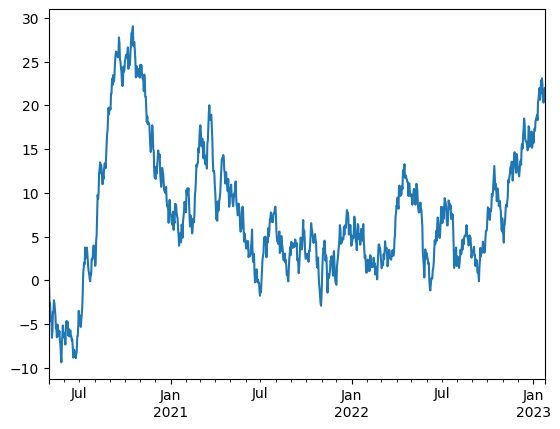

In [95]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("5/1/2020", periods=1000))

ts = ts.cumsum()

ts.plot()

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

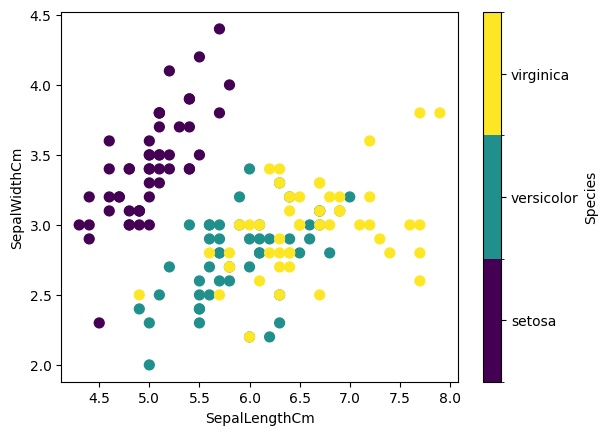

In [96]:
# c: variable categorica
# cmap: escala de color
# s: tamaño de los puntos

iris.plot.scatter(x='SepalLengthCm', y='SepalWidthCm', c='Species', cmap="viridis", s=50)

<Figure size 640x480 with 0 Axes>

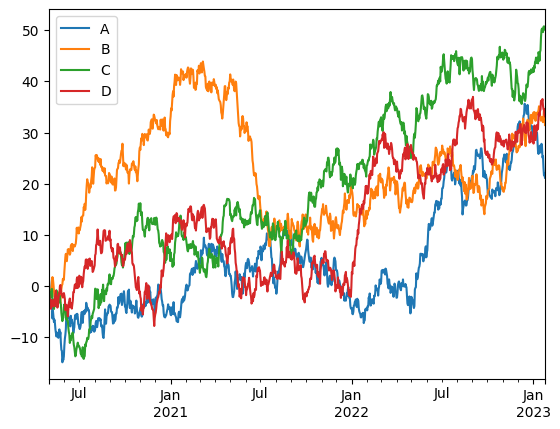

In [97]:
# Usando matplotlib ampliando pandas:

df = pd.DataFrame(
    np.random.randn(1000, 4), 
    index=ts.index, 
    columns=["A", "B", "C", "D"]
)


df = df.cumsum()

plt.figure()

df.plot()

plt.legend(loc='best')

# Numpy

1. [Método array() (4.1.3)](#Método-array())
2. [Método arange()](#Método-arange())
3. [Matrices básicas en numpy](#Matrices-basicas-en-numpy)
4. [Métodos random() / indices()](#Metodos-random()-/-indices())
5. [Réplicas o copias con numpy](#Replicas-o-copias-con-numpy)
6. [Leer un archivo csv con el método loadtxt()](#Leer-un-archivo-csv-con-el-metodo-loadtxt())
7. [Modificación de matrices](#Modificacion-de-matrices)
8. [Slicing](#Slicing)
9. [Comparacion entre Arrays](#Comparacion-entre-Arrays)
10. [Operaciones (4.1.3)](#Operaciones)
11. [Matematical functions(4.1.3)](#Matematical-functions)

In [1]:
# pip install numpy

In [2]:
import numpy as np

## Método ```array()```

Un array puede formarse apartir de otras estructuras de Python como son listas o tuplas:

In [3]:
e = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])
e

array([[1, 2],
       [3, 4],
       [5, 6]])

In [4]:
len(e)

3

In [5]:
e.shape

(3, 2)

In [6]:
e.size

6

In [7]:
e[0]

array([1, 2])

In [8]:
for i in range(len(e)):
    # print(e[i])
    for j in range(len(e[i])):
        print(e[i][j])

1
2
3
4
5
6


In [9]:
a1d = np.array((1, 5, 6))
a1d

array([1, 5, 6])

Se puede añadir otro atributo que es ```dtype``` indicando de cuantos bytes consta el array:

In [10]:
np.array([127, 128, 129], dtype=np.int8)

OverflowError: Python integer 128 out of bounds for int8

Representa enteros desde -128 a 127, arroja un error de fuera de rango.

Lo normal es que se formen arrays entre 32 o 64-bit de valores enteros o decimales:

In [11]:
a = np.array([2, 3, 4], dtype=np.uint32)
b = np.array([5, 6, 7], dtype=np.uint32)
c = a - b
c

array([4294967293, 4294967293, 4294967293], dtype=uint32)

In [12]:
c_32 = a - b.astype(np.int32)
c_32

array([-3, -3, -3])

El método ```.astype()``` convierte el array b en ```int32```, en vez en ```uint32```.

Podemos saber de que tipo de datos son mediante la función ```issubdtype()```:

In [155]:
d = np.dtype(np.int64)

# 1º Atributo es el array a testear y 2º Atributo el tipo que queremos comparar (entero, decimal, etc):

print(np.issubdtype(d, np.integer))
print(np.issubdtype(d, np.floating))

True
False


Los tipos de datos pueden ser: boleanos (bool), enteros (int), enteros sin signo (uint), decimales (float) y complejos (complex).

También pueden ser: string numpy.str_ dtype (U character code), secuencia de bytes numpy.bytes_ (S character code), and arbitrary byte sequences, via numpy.void (V character code).

In [156]:
np.array(["hello", "world"], dtype="S7").tobytes()

b'hello\x00\x00world\x00\x00'

## Método ```arange()```. 
## Numeros dentro de un rango:

**Generación de números con numpy en un rango**

In [14]:
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [15]:
type(a)

numpy.ndarray

**Formas de imprimir la información**

In [16]:
a

array([0, 1, 2, 3, 4, 5])

In [17]:
for i in a:
    print(i)

0
1
2
3
4
5


**Longitud, forma, tamaño**

In [18]:
a

array([0, 1, 2, 3, 4, 5])

In [19]:
len(a)

6

In [20]:
a.shape

(6,)

In [21]:
a.size

6

**Máximos y mínimos**

In [22]:
a

array([0, 1, 2, 3, 4, 5])

In [23]:
max(a)

np.int64(5)

In [24]:
min(a)

np.int64(0)

**Comprobación de elementos en el array**

In [25]:
a

array([0, 1, 2, 3, 4, 5])

In [26]:
25 in a

False

In [27]:
0 in a

True

In [28]:
25 not in a

True

In [29]:
0 not in a

False

**Redefinir el tamaño**

In [30]:
a

array([0, 1, 2, 3, 4, 5])

In [31]:
a1 = a.reshape(2, 3)
a1

array([[0, 1, 2],
       [3, 4, 5]])

**Generar números en un intervalo**

In [32]:
# sin especificar va de 1 en 1
b = np.arange(2,7) # 2, 3, 4, 5, 6
b

array([2, 3, 4, 5, 6])

**Generar números en un intervalo con salto**

In [33]:
c = np.arange(10, 40, 5)
c

array([10, 15, 20, 25, 30, 35])

In [34]:
d = np.arange(10, 41, 5)
d

array([10, 15, 20, 25, 30, 35, 40])

También tenemos el atributo ```dtype```para definir de que tipo son los valores que forman el array:

In [35]:
# Definimos un array que empice en 2 y acabe en 9 y sean decimales:

np.arange(2, 10, dtype=float)

array([2., 3., 4., 5., 6., 7., 8., 9.])

## ```linspace()```

In [36]:
# Recogemos una muestra de los datos, especificamos: min, max, y cada tantos recoja un valor

In [37]:
f = np.linspace(10, 20, 2) # de 10 a 20 con 2 elementos
f

array([10., 20.])

In [38]:
g = np.linspace(10, 20, 5) # de 10 a 20 muestra 5
g

array([10. , 12.5, 15. , 17.5, 20. ])

In [39]:
g1 = np.linspace(10, 20, 3) # de 10 a 20 muestra 3
g1

array([10., 15., 20.])

## Matrices basicas en numpy

## 2D: Método ```eye()```,  ```diag()``` / ```vander()```

### Matriz Identidad: Diagonal principal llena de 1, resto 0

**```eye(n, m)```**

In [40]:
h = np.eye(3) # de 3 filas y 3 columnas --> matriz identidad
h

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [41]:
i = np.eye(5) # Matriz de 5 filas y 5 columnas 
i

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [42]:
# n = filas, m = columnas, el resto que no son de la diagonal las rellena con 0:

np.eye(3, 5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

**```diag()```**

In [43]:
# Los elementos estan en la diagonal principal:

a2D = np.diag([1, 2, 3]) 
a2D

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [44]:
# El segundo parámetro es agregar un fila y columna de 0:

np.diag([1, 2, 3], 1)

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

**```vander(x, n)```**

In [45]:
# x = array 1d, la lista o tupla de valores, n = al número de columnas:
np.vander([1, 2, 3, 4], 2)

array([[1, 1],
       [2, 1],
       [3, 1],
       [4, 1]])

In [46]:
# Se crea una matriz decreciente de los valores 1, 2, 3, 4, que contiene 4 columnas:
# así, la primera columna decrece 64, 27, 8, 1
# segunda columna: 16, 9, 4, 1.

np.vander((1, 2, 3, 4), 4)

array([[ 1,  1,  1,  1],
       [ 8,  4,  2,  1],
       [27,  9,  3,  1],
       [64, 16,  4,  1]])

### Matriz identidad multiplicada por un valor

In [47]:
j = 5 * i
j

array([[5., 0., 0., 0., 0.],
       [0., 5., 0., 0., 0.],
       [0., 0., 5., 0., 0.],
       [0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 5.]])

## Métodos ```zeros()``` / ```ones()```

### Matriz de todo 1

In [48]:
k = np.ones((3, 4)) # Matriz de 3 filas por 4 columnas --> valores 1
k

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [49]:
# se puede añadir un tercer parámetro que es el numero de arrays:

np.ones((2, 3, 2))

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

### Matriz de todo 0

In [50]:
l = np.zeros((3, 4)) # Matriz de 0s --> 3 filas por 4 columnas
l

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [51]:
l2 = np.zeros((6, 2))
l2

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [52]:
np.zeros((2, 3, 2))  # Idem: a ones()

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

## Metodos ```random()``` / ```indices()```

```random()``` genera valores pseudoaletarios entre 0 y 1:

In [53]:
from numpy.random import default_rng

# 42: corresponde a seed
# array de 2 filas x 3 columnas

default_rng(42).random((2,3))

array([[0.77395605, 0.43887844, 0.85859792],
       [0.69736803, 0.09417735, 0.97562235]])

In [54]:
default_rng(42).random((2,3,2))  # idem a ones()

array([[[0.77395605, 0.43887844],
        [0.85859792, 0.69736803],
        [0.09417735, 0.97562235]],

       [[0.7611397 , 0.78606431],
        [0.12811363, 0.45038594],
        [0.37079802, 0.92676499]]])

```indices()```: genera una matriz de un conjunto de matrices:

In [55]:
# Matriz de 3 filas por 3 columnas:

np.indices((3,3))

array([[[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]],

       [[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]])

# Replicas o copias con numpy

In [56]:
a = np.array([1, 2, 3, 4, 5, 6])
b = a[:2]
b += 1
print('a =', a, '; b =', b)

a = [2 3 3 4 5 6] ; b = [2 3]


El cambio realizado a b afecta en a en este caso es una réplica de a.

Ahora veamos que ocurre si usamos ```numpy.copy()```

In [57]:
a = np.array([1, 2, 3, 4])
b = a[:2].copy()
b += 1
print('a = ', a, 'b = ', b)

a =  [1 2 3 4] b =  [2 3]


En este caso, a no se ve afectado por los cambios de b, ya que b es una copia de a.

In [58]:
A = np.ones((2, 2))
print('A: \n', A)
B = np.eye(2, 2)
print('B: \n', B)
C = np.zeros((2, 2))
print('C: \n', C)
D = np.diag((-3, -4))
print('D: \n', D)
a4d = np.block([[A, B], [C, D]])
print('4D: \n', a4d)

A: 
 [[1. 1.]
 [1. 1.]]
B: 
 [[1. 0.]
 [0. 1.]]
C: 
 [[0. 0.]
 [0. 0.]]
D: 
 [[-3  0]
 [ 0 -4]]
4D: 
 [[ 1.  1.  1.  0.]
 [ 1.  1.  0.  1.]
 [ 0.  0. -3.  0.]
 [ 0.  0.  0. -4.]]


```np.block```: crea la matriz resultante de:
[ 
    [A, B],
    [C, D]
]


## Leer un archivo csv con el metodo ```loadtxt()```

In [59]:
# Poner nombre del archivo, seleccionar el delimitador que en este ejemplo es (,) y escapar la cabecera del documento (skiprows):

np.loadtxt('simple.csv', delimiter = ',', skiprows = 1) 

array([[0., 0.],
       [1., 1.],
       [2., 4.],
       [3., 9.]])

## Modificacion de matrices

### Transpuesta de una matriz: ```transpose()``` & ```.T```

**Intercambio de filas por columnas**

In [60]:
m = np.array([[1, 2, 3],
             [4, 5, 6]])
m

array([[1, 2, 3],
       [4, 5, 6]])

In [61]:
# Opción 1
m.transpose()

array([[1, 4],
       [2, 5],
       [3, 6]])

In [62]:
# Opción 2
m.T

array([[1, 4],
       [2, 5],
       [3, 6]])

### Logic functions: Metodos ```all()``` & ```any()```

In [63]:
n = np.array([[1, 2, 3],
             [4, 5, 6]])
n

array([[1, 2, 3],
       [4, 5, 6]])

In [64]:
# ALL --> ¿Todos los elementos son mayores de 0? --> True/False
np.all(n>0)

np.True_

In [65]:
np.all(n>2)

np.False_

In [66]:
# ANY --> ¿Algún elemento son mayores de 2?
np.any(n>2)

np.True_

Si queremos declarar un array con valores nulos usaremos: ```np.nan``` y lo comprobaremos mediante la función ```np.isnan()```

In [153]:
x = np.array([[1., 2.], [np.nan, 3.], [np.nan, np.nan]])
x

array([[ 1.,  2.],
       [nan,  3.],
       [nan, nan]])

In [154]:
# isnan nos muestra el array resultante con salida de True si es un valor nulo o False si no es un valor nulo:

np.isnan(x)

array([[False, False],
       [ True, False],
       [ True,  True]])

### Función ```ravel()```

In [67]:
# Pone en una sola dimensión una matriz

In [68]:
p = np.array([[1, 2, 3],
             [4, 5, 6]])
p

array([[1, 2, 3],
       [4, 5, 6]])

In [69]:
# np.ravel(matriz a modificar)
np.ravel(p)

array([1, 2, 3, 4, 5, 6])

In [70]:
p1 = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])
p1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [71]:
np.ravel(p1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

### ```flatten()```

In [72]:
# Es una copia del array pero en 1 sola dimensión

In [73]:
matriz = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
matriz

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [74]:
# nombre matriz + flatten()
matriz.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [75]:
m = matriz.flatten()

In [76]:
m.shape

(9,)

### ```roll()```

In [77]:
# np.roll(array, desplazamiento, eje)
# Desplaza los elementos de manera circular a través de una dimensión

In [78]:
b = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])
b

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [79]:
# Desplazamiento= 1 y eje horizontal
np.roll(b, 1, axis=0)

array([[ 9, 10, 11, 12],
       [ 1,  2,  3,  4],
       [ 5,  6,  7,  8]])

In [80]:
# Desplazamiento = 1 y eje vertical
np.roll(b, 1, axis=1)

array([[ 4,  1,  2,  3],
       [ 8,  5,  6,  7],
       [12,  9, 10, 11]])

In [81]:
# Desplazamiento= -1 y eje horizontal
np.roll(b, -1, axis=0)

array([[ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [ 1,  2,  3,  4]])

In [82]:
# Desplazamiento = -1 y eje vertical
np.roll(b, -1, axis=1)

array([[ 2,  3,  4,  1],
       [ 6,  7,  8,  5],
       [10, 11, 12,  9]])

### ```logspace()```

In [83]:
# Array de elementos logarítmicos espaciados

In [84]:
# np.logspace(10^inicio, 10^fin, divisiones(elementos))
# como en linspace se incluye los extremos (inicios-->fin)
c = np.logspace(0, 1, 3)
c

array([ 1.        ,  3.16227766, 10.        ])

In [85]:
# 10^0 = 1 ; 10^1 = 1; 3 divisiones(elementos)

$$ 10^0 = 1\,\,\,\,y\,\,\,\, 10^1=1\,\,\,\,3 divisiones(elementos) $$

## Slicing 
### Acceso a un elemento de un array:

In [87]:
matriz = np.array([
    [10, 20],
    [30, 40]
])
matriz

array([[10, 20],
       [30, 40]])

In [88]:
matriz[0][0] # fila 0 columna 0

np.int64(10)

In [89]:
matriz[0][1] # fila 0 columna 1

np.int64(20)

**Otro ejemplo...**

In [90]:
q = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
q

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [91]:
# Opción 1
q[2][1] # --> fila 2 y columna 1 (listas 0, 1, 2)

np.int64(8)

In [92]:
q[0][2]

np.int64(3)

In [93]:
# Opción 2
q[2, 1]

np.int64(8)

In [94]:
# dos primeras filas (: --> todas)
q[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [95]:
q[2:]

array([[7, 8, 9]])

In [96]:
# Filtrar por columnas
q[:,[0]]

array([[1],
       [4],
       [7]])

In [97]:
# Filtrar por columnas
q[:,[0,1]]

array([[1, 2],
       [4, 5],
       [7, 8]])

In [98]:
# También sigue como las listas [start:stop:step]

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x[1:12:2]

array([1, 3, 5, 7, 9])

### Array de 5 x 5

In [99]:
a = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
])
a

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

### Imprimir desde la 3ª columna hasta el final

In [100]:
a # mostrar la información de la matriz

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [101]:
# ojo, empezamos contando 0...(0-1-2) hasta la columna 2 (la tercera)
# : antes del igual indica todas las filas
# todas las filas, las columnas de 0 hasta 2 (2 no incluída)
a[:, :2]

array([[ 1,  2],
       [ 6,  7],
       [11, 12],
       [16, 17],
       [21, 22]])

In [102]:
# todas las columnas de las 2 primeras filas
a[:2]

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [103]:
a[:2, :]

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [104]:
a[:, 1:2]

array([[ 2],
       [ 7],
       [12],
       [17],
       [22]])

In [105]:
# NOTA: esta parte será importante para el tema de visualización de los datos en dataframe,
# ver el tema de df.loc o df.iloc

**Type...**

In [106]:
type(a[:,2:])

numpy.ndarray

### Imprimo desde la primera columna hasta la 2ª (incluida)

In [107]:
a

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [108]:
# Opción 1

a[:, :2]

array([[ 1,  2],
       [ 6,  7],
       [11, 12],
       [16, 17],
       [21, 22]])

In [109]:
# Opción 2

a[:, 0:2]

array([[ 1,  2],
       [ 6,  7],
       [11, 12],
       [16, 17],
       [21, 22]])

### Imprimo las pares

In [110]:
a

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [111]:
# ":" antes de la coma equivale a todas las filas
# inicio:final:incremento (si añades un segundo ":" es poner el incremento)
# en el final si no ponemos nada es el final

In [112]:
a[:, 1::2]

array([[ 2,  4],
       [ 7,  9],
       [12, 14],
       [17, 19],
       [22, 24]])

In [113]:
a[:, 1::3]

array([[ 2,  5],
       [ 7, 10],
       [12, 15],
       [17, 20],
       [22, 25]])

### Imprimir las impares

In [114]:
a

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [115]:
a[:, 0::2]

array([[ 1,  3,  5],
       [ 6,  8, 10],
       [11, 13, 15],
       [16, 18, 20],
       [21, 23, 25]])

In [116]:
a[:, 0:2:2]

array([[ 1],
       [ 6],
       [11],
       [16],
       [21]])

In [117]:
a[:, 0:3:2]

array([[ 1,  3],
       [ 6,  8],
       [11, 13],
       [16, 18],
       [21, 23]])

## Comparacion entre Arrays

In [124]:
# Creamos los arrays

In [125]:
s = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
s

array([[1, 2, 3],
       [4, 5, 6]])

In [126]:
t = np.array([
    [100, 200, 3],
    [400, 5, 6]
])
t

array([[100, 200,   3],
       [400,   5,   6]])

**Los comparo**

**```np.where(condicion, si es cierto, si es falso)```**

In [127]:
np.where(s==t, "True", "False")

array([['False', 'False', 'True'],
       ['False', 'True', 'True']], dtype='<U5')

In [128]:
np.where(s==t, "Si", "No")

array([['No', 'No', 'Si'],
       ['No', 'Si', 'Si']], dtype='<U2')

In [129]:
np.where(s==t, 1, 0)

array([[0, 0, 1],
       [0, 1, 1]])

## Concatenación de arrays

**Crear los arrays**

In [136]:
y = np.array([
    [1, 2],
    [3, 4]
])
y

array([[1, 2],
       [3, 4]])

In [137]:
z = np.array([
    [5, 6]
])

**Concatenación por filas**

In [138]:
np.concatenate((y,z), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

**Concatenación por colunmas**

In [139]:
z1 = z.transpose()
z1

array([[5],
       [6]])

In [140]:
np.concatenate((y,z1), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

## Operaciones

In [118]:
# Potencias

In [119]:
r = np.array([1, 2, 3, 4])
r

array([1, 2, 3, 4])

In [120]:
# Método 1

In [121]:
r**2 # 1^1, 2^2, 3^3, 4^4

array([ 1,  4,  9, 16])

In [122]:
# Método 2 

In [123]:
pow(r, 2)

array([ 1,  4,  9, 16])

### Producto escalar y producto vectorial de 2 vectores

In [130]:
w = np.array([1, 2, 3])
w

array([1, 2, 3])

In [131]:
x = np.array([2, 5, -4])
x

array([ 2,  5, -4])

**Producto escalar:**

In [132]:
# w * x = ((1*2) + (2*5) + (3*-4))

In [133]:
# np.dot(matriz1, matriz2)
np.dot(w,x)

np.int64(0)

**Producto Vectorial:**

In [134]:
## Producto Vectorial

# i j k
# 1 2 3
# 2 5 -4

# y se opera:
# -8i+5K+6j -(-4k-4j+15i) = -23i+10j+1k --> (-23, 10, 1)

In [135]:
np.cross(w, x)

array([-23,  10,   1])

### Matriz con "matrix"

In [141]:
# 4 filas 4 columnas
u = np.matrix([
    [4, -3, 11, 1],
    [5, 9, 7, 2],
    [2, 3, 4, 1],
    [5, 3, -5, -9]
])
u

matrix([[ 4, -3, 11,  1],
        [ 5,  9,  7,  2],
        [ 2,  3,  4,  1],
        [ 5,  3, -5, -9]])

In [142]:
# 1 fila y 4 columnas
v = np.matrix([4, 9, 1, 3])
v

matrix([[4, 9, 1, 3]])

**Suma**

In [143]:
u + v

matrix([[ 8,  6, 12,  4],
        [ 9, 18,  8,  5],
        [ 6, 12,  5,  4],
        [ 9, 12, -4, -6]])

**Resta**

In [144]:
u - v

matrix([[  0, -12,  10,  -2],
        [  1,   0,   6,  -1],
        [ -2,  -6,   3,  -2],
        [  1,  -6,  -6, -12]])

**Producto**

In [145]:
u * v

ValueError: shapes (4,4) and (1,4) not aligned: 4 (dim 1) != 1 (dim 0)

In [146]:
# ValueError --> es necesario realizar la transpuesta para este caso, ya que las dimensiones No son las adecuadas

**Opción 1:**

In [147]:
u*v.transpose()

matrix([[  3],
        [114],
        [ 42],
        [ 15]])

**Opción 2:**

In [148]:
u*v.T

matrix([[  3],
        [114],
        [ 42],
        [ 15]])

**Opción 3:**

In [149]:
np.dot(u, v.T)

matrix([[  3],
        [114],
        [ 42],
        [ 15]])

**Traza de una matriz**

**(suma de los elementos de la diagonal principal)**

In [150]:
u -v

matrix([[  0, -12,  10,  -2],
        [  1,   0,   6,  -1],
        [ -2,  -6,   3,  -2],
        [  1,  -6,  -6, -12]])

In [151]:
type(u-v)

numpy.matrix

In [152]:
np.trace(u-v) # 0 + 0 + 3 + (-12) = -9 (suma de los elementos de la diagonal principal)

np.int64(-9)

## Matematical functions

### Trigonometric functions

|                    Functions                    |                         Description                         |
| ------------------------------------------------| ------------------------------------------------------------|
| sin(x, /[, out, where, casting, order, ...])    | Trigonometric sine, element-wise.                           |
| cos(x, /[, out, where, casting, order, ...])    | Cosine element-wise.                                        |
| tan(x, /[, out, where, casting, order, ...])    | Compute tangent element-wise.                               |
| arcsin(x, /[, out, where, casting, order, ...]) | Inverse sine, element-wise.                                 |
| asin(x, /[, out, where, casting, order, ...])   | Inverse sine, element-wise.                                 |
| arccos(x, /[, out, where, casting, order, ...]) | Trigonometric inverse cosine, element-wise.                 |
| acos(x, /[, out, where, casting, order, ...])   | Trigonometric inverse cosine, element-wise.                 |
| arctan(x, /[, out, where, casting, order, ...]) | Trigonometric inverse tangent, element-wise.                |
| atan(x, /[, out, where, casting, order, ...])   | Trigonometric inverse tangent, element-wise.                |
| hypot(x1, x2, /[, out, where, casting, ...])    | Given the "legs" of a right triangle, return its hypotenuse.|
| degrees(x, /[, out, where, casting, order, ...])| Convert angles from radians to degrees.                     |
| radians(x, /[, out, where, casting, order, ...])| Convert angles from degrees to radians.                     |

### Rounding

|                    Functions                   |                         Description                   |
| -----------------------------------------------| ------------------------------------------------------|
|  round(a[, decimals, out])                     | Evenly round to the given number of decimals.         |
|  around(a[, decimals, out])                    | Round an array to the given number of decimals.       |
|  rint(x, /[, out, where, casting, order, ...]) | Round elements of the array to the nearest integer.   |
|  fix(x[, out])                                 | Round to nearest integer towards zero.                |
|  floor(x, /[, out, where, casting, order, ...])| Return the floor of the input, element-wise.          |
|  ceil(x, /[, out, where, casting, order, ...]) | Return the ceiling of the input, element-wise.        |
|  trunc(x, /[, out, where, casting, order, ...])| Return the truncated value of the input, element-wise.|

### Sums, products, differences

|                    Functions                   |                                         Description                                          |
| -----------------------------------------------| ---------------------------------------------------------------------------------------------|
| prod(a[, axis, dtype, out, keepdims, ...])     | Return the product of array elements over a given axis.                                      |
| sum(a[, axis, dtype, out, keepdims, ...])      | Sum of array elements over a given axis.                                                     |
| nanprod(a[, axis, dtype, out, keepdims, ...])  | Return the product of array elements over a given axis treating Not a Numbers (NaNs) as ones.|
| nansum(a[, axis, dtype, out, keepdims, ...])   | Return the sum of array elements over a given axis treating Not a Numbers (NaNs) as zero.    |
| cumprod(a[, axis, dtype, out])                 | Return the cumulative product of elements along a given axis.                                |
| cumsum(a[, axis, dtype, out])                  | Return the cumulative sum of the elements along a given axis.                                |
| gradient(f, *varargs[, axis, edge_order])      | Return the gradient of an N-dimensional array.                                               |
| cross(a, b[, axisa, axisb, axisc, axis])       | Return the cross product of two (arrays of) vectors.                                         |

### Arithmetic operations

|                      Functions                   |                      Description                                          |
| -------------------------------------------------| --------------------------------------------------------------------------|
| add(x1, x2, /[, out, where, casting, order, ...])|  Add arguments element-wise.                                              |
| reciprocal(x, /[, out, where, casting, ...])     | Return the reciprocal of the argument, element-wise.                      |
| positive(x, /[, out, where, casting, order, ...])| Numerical positive, element-wise.                                         |
| negative(x, /[, out, where, casting, order, ...])| Numerical negative, element-wise.                                         |
| multiply(x1, x2, /[, out, where, casting, ...])  | Multiply arguments element-wise.                                          |
| divide(x1, x2, /[, out, where, casting, ...])    | Divide arguments element-wise.                                            | 
| power(x1, x2, /[, out, where, casting, ...])     | First array elements raised to powers from second array, element-wise.    |
| pow(x1, x2, /[, out, where, casting, order, ...])| First array elements raised to powers from second array, element-wise.    |
| subtract(x1, x2, /[, out, where, casting, ...])  | Subtract arguments, element-wise.                                         |
| true_divide(x1, x2, /[, out, where, ...])        | Divide arguments element-wise.                                            |
| floor_divide(x1, x2, /[, out, where, ...])       | Return the largest integer smaller or equal to the division of the inputs.|
| float_power(x1, x2, /[, out, where, ...])        | First array elements raised to powers from second array, element-wise.    |
| fmod(x1, x2, /[, out, where, casting, ...])      | Returns the element-wise remainder of division.                           |
| mod(x1, x2, /[, out, where, casting, order, ...])| Returns the element-wise remainder of division.                           |

### Extrema finding

|                      Functions                   |                      Description                        |
| -------------------------------------------------| --------------------------------------------------------|
| maximum(x1, x2, /[, out, where, casting, ...])   | Element-wise maximum of array elements.                 |
| max(a[, axis, out, keepdims, initial, where])    | Return the maximum of an array or maximum along an axis.|
| minimum(x1, x2, /[, out, where, casting, ...])   | Element-wise minimum of array elements.                 |
| min(a[, axis, out, keepdims, initial, where])    | Return the minimum of an array or minimum along an axis.|

*Creado por:*

*Isabel Maniega*